### Simple Linear Regression with NumPy
In school, students are taught to draw lines like the following.

$$ y = 2 x + 1$$

They're taught to pick two values for $x$ and calculate the corresponding values for $y$ using the equation. Then they draw a set of axes, plot the points, and then draw a line extending through the two dots on their axes.

In [1]:
# Import matplotlib.
import matplotlib.pyplot as plt

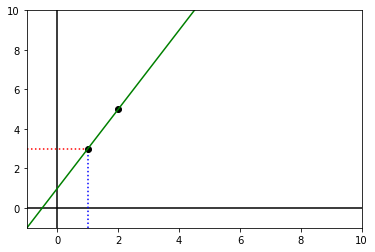

In [2]:
# Draw some axes.
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')

# Plot the red, blue and green lines.
plt.plot([1, 1], [-1, 3], 'b:')
plt.plot([-1, 1], [3, 3], 'r:')

# Plot the two points (1,3) and (2,5).
plt.plot([1, 2], [3, 5], 'ko')
# Join them with an (extending) green lines.
plt.plot([-1, 10], [-1, 21], 'g-')

# Set some reasonable plot limits.
plt.xlim([-1, 10])
plt.ylim([-1, 10])

# Show the plot.
plt.show()

Simple linear regression is about the opposite problem - what if you have some points and are looking for the equation? It's easy when the points are perfectly on a line already, but usually real-world data has some noise. The data might still look roughly linear, but aren't exactly so.

### Example (contrived and simulated)

![img](data:image/png;base64,%20iVBORw0KGgoAAAANSUhEUgAAAhUAAAE2CAYAAADWNGB7AAAgAElEQVR4Xu2dCbQtV13mvwdRSDRESVgMIkhAZFCUCLZKgIYwhEFCFAgqAQ3wnm0HMEyLQaYAymoCiKbR94AoBmgCGAxTM9MokUYFDBoxIgqIDKsNSoCE6IXb6/ey/2GnUufeqnOqTu1d59trvfXeva9q713ff1ftb//HPXIzAkbACBgBI2AEjMAACOwZoA93YQSMgBEwAkbACBgBmVR4ERgBI2AEjIARMAKDIGBSMQiM7sQIGAEjYASMgBEwqfAaMAJGwAgYASNgBAZBwKRiEBjdiREwAkbACBgBI2BS4TVgBIyAETACRsAIDIKAScUgMLoTI2AEjIARMAJGwKTCa8AIGAEjYASMgBEYBAGTikFgdCdGwAgYASNgBIyASYXXgBEwAkbACBgBIzAIAiYVg8DoToyAETACRsAIGAGTCq8BI2AEjIARMAJGYBAETCoGgdGdGAEjYASMgBEwAiYVXgNGwAgYASNgBIzAIAiYVAwCozsxAkbACBgBI2AETCq8BoyAETACRsAIGIFBEDCpGARGd2IEjIARMAJGwAiURCqeLelZA4rkOZLo020xAj8g6XGSbibpe9Jl/y7pnyS9VNKnDV7RCPySpEdI+q9plv9H0h9IelXRs/bk+iDAO/qShoxP87vZB8Lir+Xb2yZjvsXVtdFIxSmnnHL4IYcc8sWtra0bnHXWWV8dEJltSaPNe8B5lt7VbyUiAfFqkgc+ZPyeRf1rpT/IBs6Pj9CbJH0lkYg/Thg8UBJE4whJJyb5bSA8s3lkZPn7iSRCGGkQSIjkLyfZz+ZhN/RBeJc5xPH3BxIGd5X0V5LuVuM7PNrmvHfv3t+U9ARJLzpw4MBTB1wwJhWrg8lpNk61O/XGR42PGH+7lYMAHxxIIXJsa8gLMvhj5UzZM+mJAO8dZJG/kXfedvq/nsP48okRCNlyIIjDHYc6ZM9ed/uJ59d7+FFIRdJS/D9J15J0+dbW1vUG1FaYVPQW81VuYPGy2aCJiFPP9za6/LfsdMR1LPw4Da82uu9eFYEw6e1m2ut63arz8f3jIMAGAzkMDUVzFN5dSCUbkFudCED84+DWNHWguYiDHweIatoopCJpKR4v6Tsl/YekFw+orTCpWG15QQ5YyPmm01zQfKjC7MF1fLwgI27TIhAfmlwDgSxvmqbFRpT7U0AG2XyqtM1OC/Wko3fVEHbVOE76MB58IQK8l3xXdyKOfK/D360KKAcnFQ0tRYAwpLbCpGK1pcVGw58+5g9IRjgDrja6714FgSB6nFz4GGFvxw4bKlTIRpir+BhxPR+uRWaSVebie8dDAHKIHHdzlOa95D22tmI8WYzV82yJ4+CkoqGlCIEMqa0wqVhtmf+NpDdm5g+iP1gHuT2PEdi4+GChqcAxjAgRt2kRCKLAhgNhyO2wMbOwx4b8goBMO3OP3hWBME2GZhBZExWXR/gQ2Ran21gTuxGQruP7uvUggNziHd1pxPxdX8/MVhxlUFKRtBQXS/qmpEslXVfSl/fs2XPo9vb2IVtbW0cO4FthUrGa0L8g6V6SME99Ji3sNnsemxYbFB+0/yvphqsN67sHQCBIHh+jncwaYSbhNBTXDjC8u1gDArl2KY/+CG1ThBFH9Ac/I++q7O5rwLH0ISCBuYYJMnlCmvR5Defc5rVFP9ugpGLfvn0Htre3T96zZ89T9u/f/9K9e/duHzhwYM++ffset729/YI9e/acvX///r0rImJSsRqAaCq20kl3kS0vRogoAkIUralYDfch7kZebCDIpRkR0Oyfj1RsNDZdDYH+evqAPKAdDI1TW/QHsmUtoM2IsG9HaK1HPkOMEibKkBnvKRrjvPE78pHQWBPhPzPE+KP2MSipaM40SMXAT2BSsRqgn0V7lDac8DBno8rt8mGHD4fNa0u61WrD+u4BEAh/mDid8iHi3xG9Q9QOHx8Sl4UM2YAcWjoA+GvqIsgCuQvIU7CIPEZYaU4+1jRFD7MiApEbKAgk2mBMWrk2Kn7HtbzjkTtoxaHHv92kYnyMSxuBUN+7S3qrpH9MCxYzSN6IJmCB3ySdht5l80cRYvycpIeljeb9klCTIqfcHwb1ORsOfyATr5Z04yJm70l0QQBSER7/XcKGkb1zknRBtpxreGcj+SDvMbkomuSRd/djWQKsCD8t5ykWzMSkongRDT5BzB+HSHpopkpHU3GdNNIl2SmX0+7rUr4Rmz8GF0XvDiGEx6WwUbQRuyW/erik90q6Xu+RfMNUCEQ0B5tK7uuUp9GPuUX0R0SLTDVnj9sPAWQM6Q8CucgfBiKBnwUaq7in30gTXG1SMQHoEw+J+eOLkl6W5hF22fy0G2mgWR8sbJs/JhZaGv5fJF0o6e0dHPOQ230lHS3pFmVM37PogMBfSkIjFdEf/E1diHDq4z3F1h7J6PgbTdQdOvTtS8pAAILA+4nsdgsHRt6sAQ4QVZgxTSrKWGTrnEWYP1jQROo8ZEHtj3MkHSWJ0y7X+rS7Tim1j0UUDqpSMtXS+CBxkomPDSpUkl/FCffypEL9yemn7hl0RIBNJBLO8TebTx56GCGG2NzRVkUiu902p47D+7I1IACpQM5dcwWFX1QVDtcmFWtYQYUNgfkDTcT90+bDhwvCcKM0z89Lgnjwe67D94JN6ocLe45NnA6air/IchTE5pMXm2KTYcPh3eYjhNysqahntfDu3TERxcgx0mZvR+YRBQTZvEE9j7jxM11k4sq1UQFSONFXY+Iyqdi89f13kvCb6Gr++NXkb+Hoj+nXChsOam5U5P+cHG7bcoy8T9L3J/8L+1RML7c+Mwi/GTKl7hT9EWGld7HfTB94i7i2aeJClmTHzTWO5CEJMommGNJYhcbRpKKINbbWScRH6/UpQdnPLjB/vDnVbnmkzR9rlc9Og2FrP0PSPSV9XzJtEIqW+8OgpcBE8jVJ70jx7zZdFSPCXSeCvxOaBzaULtEfoRq3+WNXaIu54B8knZnMWsiPCJCvNEJKyQ0UpBIT2K/UEtZvUlHMOlvbRPhY4SsR5g8WLI5eqMjJAfKp5CgWIU+YP/61FiehtaE4zUDIDg3EjycigezIjMrvaGgvXpw+VmwyH0m/q8LBaxpIixuVUyyRVjdvRH/kp9hcNQ6hZJOyo2Zxolw4IYgj0Xe8z+QjITS8mbwMx0z8pVgLyJ4ovCpMXCYV9SzEoWbKB4jkV2H+CLtsqNGx4YU6jvWBGo5Tse3yQ0lg+X5yfxg2E6ICTmwkLntTig6AVNgfZnmsp7qzSSogjmif8pBSNBg4afI7DgFsTCYVU0ms/7gkqYMsRH6RRRWgMXtAPDjgIeNIctd/xDXeYVKxRrALGQrygB0W8wbk4pQFiVdeKQkVHOYR2+XLEB4nHLJoni7p0Ewrkc8utBfU3mEzQs1q80cZ8usyC8gi5g98n6I6MCQid8blZ1TmJK3D1wmH3CpOsV0A2IBrMEHzXX1LOsAtKgaH/CEVPyPpDbXI2KRiA1Zw4xFZpHyAjk/qVTQVx0j6jnTdf0rC0S+y+mGXZzOzCn36tRL+MMiHcOCTFhBCVKWYuMicSjZUbzjTy67rDELGH5ZETpn/0jCD0A8aCv6fjLf8v0l/V3TLuI7v6dskfTVpK3aaFVqKwyXdr5b32KSijEW2zllg/iA9NxsT+Q4iRWzu7BcpYilZj7PQbZMJZJ3z9FhXRyAid34jy3pKKt+8bgvyjNogT3PkTnXLKEjFe1LSObSKbSGlRIeQh+TnajrFVieNcSaMGfP6KXR4t5L1aCsII/9SLWH9JhXjLJqSe+WEC1E4N2kgfj1Trca8Uac+LzFj1HQ+7ZYhUT4uqLs5udAgfy9KWTP5GbL4hLQJcZrFcRMiQt4DtzoQgPSz6UAk2HA4qRJuGBk0sb9j4sLXiQ2HNeBcJHXINmaJeet2kg7Lph0pufkVTpoksYuGKfPjDimV5CqlRa70v05kgbDEqFJKkSp+T/uRVISKhc1H692SSLpk88f04kReqLohC5AGNpioeMjsopIhzpqEqN0ymUBs/phedl1ngKPmrZNmEP8nCD5F4XCWpn1CErlj8LFgDfBu8js7anZFePrrQlMR32D8Y/i+8s7S8GVDvjhhxzfYmgqQMamYfvW2zICT0J+n8NG/z4rV5I5gfMhY6D+Uclncx+aPImQZXuN4/CNH7OltDfkSZkqyHE68VXiNF4Hw9JNAXoSTQu4jZTfOuXn0B9oL8pOw4XAYuMikYnrB9ZgBPhXkCfpWkivfW0yW+TeYQx3fYKwJJCuknEIVhwObP3qshJlcyoIm4oN8BuSfeGGKk84fjxPwE5OzH3kQzpZ05Eyev+bHiI8RTpioTjnRsMFgX6fdNanGOfGgMkW+D+hQtKhmTOY2d4gEkVlRNZgTLNqo3PyBzKvccOYmrCWfJ/xmPiTpm8kU0vStgDBi8rhmcqrHXF1FFJdJxZKrouLbcOwj2dUPpmeAIT9I0tfTRsWaeGOW3e2TKRkWDoBu0yKALZYTLKpwVOPI7hck3SlN63xJr02yC9U4J9kq0vtOC20xo7Ph8G6yyUAKMWu0pWLHTAK5hHTga1PFhlMMytNOJDSOyJj8E4u+rZhJ+FZDMJynApnZ/DHtyl0wOqddkiJx0sV7HBKByjWPIEAdx8InOoQT7z182i1CljhdUoYeMsFGQ/IrkujkalM+PpTGhlSgQv1GLel9i0B4+kmEJhH1OKdYtE+LCoodktTiZ9WiGp8e3iJmgIzJH0NYP6QBrRPvbJ6AkHcbh3pS8xPW/6havsHWVBSxxtY6ifhokRgJ1drvJPNHvqBJD/uY9FHDduuP1lpFtHAwIndOlvSKZI/FwTYIRdwEIURbQeNDZNmVIbuus8BXhncUGdOI/IAcNivREv0RMoZYhiNn13F83XQI5KHhUQKdQ1xu4sIPinc5nK85TFRR1NGkYrqFNdXITfMH6nMytuVld8n0RhpvTrucfFn4Nn9MJbFvj5uTii1JD19AKogWuIZJxfQCW2IGmLjYPMIxk42FfCNECtCIxiJPSZAMDgNsUjZxLQH2RLeEGfO70vh8e0lYF47XJDajNkj4WVwm6YJaZGxSMdGqmnBYFioLmGx8Yf7gA5Unv+JDRvtOO/tNKKmrD900f+Cwd9OG6YrUzcS82/xRlOg6TyZPjARhQKOIPPOG3FGXR9G4L9SSGKkzCvO+EH8YIuuI0ArfKMwdeYQP8kVDFflmqonwMamY9+Jte7owf/yPZG/fyfyBzfY3U/GiKsKZZi7ONkfNn5f00+m5/yyZPkicw8cIouhTbF2LIiJ8iP6I3DCQitz8AamgojCnV8INHeFTl4wjq3GYKTFx8c5CImj4TD0iJTjjPb5vTVmNTSrqWoxDzDayMgZL/sWkRidREo3cFX8o6TUZS3ZWxiGQX72P2HCOlkSNFt5fPkTNbIvYZ9EyEZIG6QjT1uozcA9jIxCRAbxzaJ3acpGw0bwzaakwlVQTGTA2eJX0T4TPU1OoML4w+McEoYhHgFhANkhuRnj/Gcmps/hHNKkoXkSDTzDMH5Qyx/zB5sSmlDtqkqeCTYkiY6hWfRIaXAxLddgn+RUJlPjjDWcpqCe7KfebweZO4qu2DQdtBZFZdsadTFRLD8x7jCMm5OLC5JDZ1hnaKeouES4c9yw96LpuNKlYF9LljMNHizS/MGXCDX83JU/KfSqI/uCEi8exzR/lyC6vCxFpurHF5uHAqMrPSyQR9Tl1PxwZUI4Md5sJMv5ycpSG6EMocK7OzR84TUP80UDxLl9XEocEtzoQCBM0ET43TOm4Q9sYT4B8SbdPJdO9s9RUbG9vY8NbS9uzZ89OZId5jEqG1vKQ0w2C+YOPEQl2+GjhZUwJ7QhXQu16TnLmZOMi+RWEw0WpppNZjNxWUIzMqIQU0lxQbHoZrTqDtsiA324kOHts5lhdVbGpVcGZyf18TzEzvz09DwcDsqZyGKBxqONnzCLhU0EBsir82jpvziYVM1nOVyRTIeTwmGT6gDS0RX9AOnDU5JREPgSStLhNi0Ae385MsLmSoruZuAx7LI1QRD5ERPq41YFAM/qD0yrRWPhX0Ij24VQbG84H0+GASqVudSAQ9V3Crw0CQZRP3sgPxO+jvgv1fqoo6tibVFx22WU67bTTdPLJJ+tOd7oiO/D555+vY4899uC/X/3qV+sXfxHfv+WbNRXLY9fhTlRvlDv/FUlUvqP4FAw535hgyhQRg1T8XlYGvUP3vmREBKJmwPskYcZCw9SWbRFNE7Va7u6y9SNKY5yueT8xeUASMFtFiHBunoxQ4s+ngmKQyCpOseNAVl2vaKN+VNKhaeZoI16eyiXwK8okPDrzc5tnngo0FRdffPFBwvDOd75TH/zgBw+SCn536qmn6tnPhlTp4N9nnnmmjjxy+fpTJhWjviSo0LG/ojLH/MHGxEcpj5Hmo8bGFDkQsPPa/DGqWDp1jpbpCZJOTx+kF6VQtNzJllA0ruFD9ExJXGMtUyd4i7gonHHRIJKb4IrT2tUbGgpyHaBRtDNuEaLrPAk0jjQOdpBFtMEc8HO/Gcz8+M6gnXhBun5eGTUvvfTS7TPOOEMnnXSSHvvYx+oZz3jGQVKBluK5z32uXvOa1+iwww67ihYj12CcfvrpB+/hugsuuECXXHKJ9u/fL35/9NFH62EPe5jufe97H/z/o446yj4Vnddn7wvZmNA+HJe8x/l4oU7NNRU4CfGxgklTMfHpLljUG+cxbkA1Dvm7f/oYcWKFRMTHiI8QssRZE7UpNQMoSmXV+BjSGKdP3k8c87Czo32AGL60MRTyRT2OEx/hhuSacUGxceQxRq+hjYIUcriDWEQ9H8aLxHUc6tBUkSzr1Fq0Ub3NH6GtyEnF2WefrZe8hHdAB0nFne98Zx1//PEHtRpcd8wxx1xJNj796U/rhS98oc45h4OwDpKUJz3pSVe5/thjjzWpGGMpX9EnHy1inlGNU/sDhyE2oiifjf0W8wd5KyhohKrdpGI8efTpGeKHHfbH04cI9SCkIk+xjpaJDSeyLf5zLbbYPkDM+Nq2uhBoIvJcJGxEvKecYon+IFFWFafYGcutz6OFNgpywfd4VpVoRyMVd7jDHVpNIWgi/vRP//QgCbn00kuvNJ3c5CY3uZJ4mFT0WZ+9rw3zBx8kWLDNH70hnOyGIISUqieHARkVIRa5vZ2fke3Xkm2Wk6zNH5OJrPfAvJ94+lMhOD+1YoOnQSxx0gyTF7lmuGeRmaT3BHzD6AiEb9SH0ruLc2JbeXtyWJDPgrou761FGzUIqWgzfxx11FEmFaOvzaUGaDpq8kFqM3+Q+pn4d0wlbFTemJaCe9Cb+BhxqsHRCyc9TFhtHyM+QDj53aumj9GgSNXbWZi4iLiCQET0R2gSKYWOuevERB6J5GIN2MRVj8zD/IF5iwMA/hMQxdwETWQX+zO/43pC/6vIjLsyqVjkqIl8m+YPzCI0ayomXf3NkNIwf3wlzQo7HqpVzB9k1PyopEfWwpInRXb8wUnZy+kl4tuxrbPp5B8jNht8LWjUDCCltxMjjS+boUZo00Yh59wZF/miufh60kaFD81Qc3A/4yIAcSSyLiqRQhKRZ/4eo4WM0ucUgKQqcRXEcWVSAfa5Q2ZEhfD7iy666KDPBI6Z+/btO2jyOPfcc00qxl2wu/XeJfkVixinFye/2g3N9f4/GgpU44dlBBBnph9JP/91ql4ZOQ1Iwf6RWkomrxfKYkfLUzjjS/ETC2ZKKDi+FY7+KFaUCydG5A7RdLmJi+yad0l+bOen9OtVmrh6k4p1yM8hpaOi3EzTjXmjmfyK6A9YNGm6z3SeilHl0afzNk1Fm+kKosG7bU1FH3TLuBYT1/NTBMiNUlKkZvQH5ki0EzjhvtKO1GUIrscs0EhgnoRY4A+F5okaL3nLy9tzEOTdn2fyqx7ALX2pScXS0HW5McwfqMT/I/1Bhd4sKAaLpqgYtnsXFOuC7PjXhE/Fh5NciOBp86kgYuf6KYFZNQ5e48NXxQhEf6BhekySLaQRm3uewwDCCPFHk8ihgObojyrEe3CS+Ei8LZFCZEg4KUQxL30eP/N+E/F1v9mGlK5DbiYVo6LcLH1OTPzPJR8KBsbHgoxuZHhjwXMacunzUUXSufPc3v7dKWkO4aN59AfpfslXQbiwT7GdoS3mwqaJi3cQp70ogf5+3NWy2br2RzGi6zyRKCj2+mTuwPm2LTMuzrnXSBF6Z82OVHSGK7tw79692wcOHOhsYuk4hguKdQRqwWWfTZncfiM5/2DeaKv9QbIVnIlcpXQ1vIe8uy1PBaccnGtp+FJw2omaAfhTOE/FkBIYv6882yKnVLSIEQXA6BEtgEOuNRXjy2OMEcJvBnLBOxuEsTkWfjNoKW5dU9bUoTf8q4BiUjHGely5T061OGJSZArzB43TT37axes4nIjIyGjzx8qwD9JBM6MmvhNsLnHKIeQMWZ7mjJqD4D1FJ+FTQcQVYdz4U2Bfz82T+FPkPhXORTKFpJYfE40jxB8/CkgD7zEax7zlfjOsgedZU4GnkTUVyy+78e4kzzxe42xAfKjIyPczjdLnpOb+3XQSwgMdwoFK3W1aBDjZ8CGK2h+UPUczkW84aC4en1KwYwpx7Y9pZdZ39Dz6g1L2i06x4exHeu64p+9Yvn4aBKil9GVJL0vfVg4CaIvzrKkc7O6WvtN8o8kZVEVouDUV0yyqKUcNex4bDupTzBss5qaj5lPT72DQ1djzpgR2DWN3rVKKJuqolIrdjpprEMyAQ4Smgqyp5CXA/IHmKX8/Odmy4XDixf/JeSoGFMAauqKWByYNsuLSIBAcDnIzJocDiAbfaCI/PpES361heqsNYVKxGn413g2peGvKddBm/sBmG1oJoj9wBLtHLdncahRIjznndSHYZPgQoXnKk+Ygu6g6+7SkMsXU5VYHAsgYJ9zIqMnGEtWCeYJIrx+1P8ioSUp2R3/UIV9m2UYqcMbNa/iQYdOkoilTmz+KXOVsQthqSZpDo3jYo5IzGD/jCEsilvPS/8OQISI2f0wvzojcOTxNhQ0G8wZZM2moyyl7Dslw5M708lpmBkR/8K7liZHYcEjPHhtSs/YH7zT1IdzqQKDN/EGkR4QNEy5Mhs0ofW7zR8jVpKLIFR7mD+zxOGFSsTRseTFhFjXOX2xMT5Z0tqQji3yazZoUvi1sOpxmkQ1yaisohsqctOuQDhLskGjHrQ4EQhvFe4c2Cns7sszt7Udk9na0Ua5SWodsY5ZNZ9xXJRNW/hRoITnwYeKyo6ZJRdErHJYMIybVMzkpUKOGoxATDwchrqH+B+YPfleFk1DRyK8+uSiZ/ClJyHGnULSbS+IPjrZUOnSrA4HIRUL+mBumqICo5RJPgA8Fvk5ci38FflE4bLrVgUDujEvI9zELpk3dJaJDqkrFbp+KOhbhkLOkPgTV8e6ZPI8fkRgx+Sto2G85FcGesfG9O8VSh/p1yLm4r34IoKkgMgcnTEghpipONGGqQnNBdAgnW4rBfVzSz9sfph/IE1+dE8e/lXRFFcartypzGEyMbSnDd01+xcGOXEH3kfQGh5Q6pLSUBdycBwuaktjnJl+JX89seXEtmgniokn1TLZNNBk2f0wv0XDwwpyBahyHzF+QRJl62p9Jem0iGphHICGo021vn152XWcQeWQoEoec0TQR/ZHnkUE7QVg4UQEfkkSiOg4KbnUgkKfp5uCGmQMzJgc5Ggc9fuawwHuOD9VxtRwOrKmoYxEOOUvU5jj0QRRwBgvzR/7RwkEIZ7/Lk4rddvkhJbB8XxAEirxBJvjYxOaSR3/EJgSpQIvxDUcGLA/4BHdGgrNjs9ofeRpn/GRw6kMrxYZEJBdroYqy2BPgWeKQzYJivKcQibxBMHjPkfE8C4otIxk7ai6D2uj3sKA51RyfPkawZD5QVC+loZHIzR/vSBqNKirkjY7etANwwiF/ATUDtiQ9fIGWiTBDagYQ1eMcI9PKrO/oOOLi+X9oupFNhUR08f7x/v63THMB8Xf0R1+Up72+rfQ5MkYbQSO3DDKed+nzZWRgUrEMaqPfw0K9SzJ/QCT2LShmsz9lccP84QRKo4ul0wA5qYhsqBGGFh2gecIEQjOp6ARrURfl4YYQCDSKFzSqlEI6SH4F0SDc0NEfRYlw18mgjSIXCYc5NMTIGFkiZxryRfaRUfOPJF1WizbK5o9d5T+7C8L8wcYTYYmcdPKMfZg/ogwvMfHYdh39Mf1SaJo/iArAsTYvi02BIqIDbP6YXl7LzCCc+MgVQ/QH71+8i9EfanHCDEl69WhJB1LumWXG8z3rRyD8ZtAYo4mK8ue5GROZ47TL+3xJTfWXTCrWv6CmHpGFS/TA/RORiKI2QRogHYQ58dFisWOzJZ+FzR9TS+6KHBXhwBeOmkR33ClN7fykpcAea0fN6eW1zAwi+uOTycl2UfQHKvQfqi3ccBlAZnhPpNvnfaYGCP4wcaiLx+X9RaNBzQ8cravRFptUzHDF7vJILGjUbq+U9PUU3RFOmnEr7PktKZwJFTo+Fo6Dn36tREgpfi+ElJJ/Am1FrqlAS8HGRIp1h5ROL7O+MwgZk1qd9xBZoq3IHanJsIns+R2h4A9x9EdfmCe9Pogj8uN7jCN8G6nAQZPvLgc6tMlV5JsxqZh0bU0yeGTso0IeDYJBxEAsaj5kLN7I4Geb7SRiah00PkbIELXoTsmv2JT4fzRTVXyMyoF50plwOiWUOzYaSCORAbl5MjIwcppl4/lSLfb2SZEtZ3DIBOatn8rChvPU68gV4kjYMNcSSl5N2LBJRTkLbV0ziZC13PzBR+w2aQIk3OEjZfPHuiTSfRw+MKhBMU+FPwzVZvNTbB7fTkZUwhGdprs7xlNfiUqc4mDIlwbJJ4Inco3w/6dkModsOBfJ1FLrNz7yoj0lyRFNI4nsco0jezMaCjHptIAAACAASURBVP68IF1fRdE4k4p+i2EOV6Nuu3vSROArcVL2gYrn40NG2CJqdsIWbf4oQ/JtBcX44GBbp/GxomS9C4qVIa9lZoFPE86anGRpnFjRTOQbDpoLTrY0NImQRhPHZdCe5p62sGGcbclyTCPaA7NzaKeI/CAypIokdiYV0yyqKUfFBstHKzd/sHgxgdAgFKyL+IhhoyfhUhUseUpg1zB2s/Q5Gw4fm9xrnJONS5+vQRgjDRHRH+dI+lbSNIV8Y8hIgMV7+lDnIhlJEuN1izypy0NdD769aBfROOaN31HfJaoNU++nCmd5k4rxFk6pPWP+IJ88HyMWLKce1sGN0oQ/n/4mpIkF/7qUaMkZ+6aXaHiNvy8lK0PL1LbhsCGhZUIj9S478U0vuB4zWMaJLxz6egzjSydEAHMlxRzfnr6xHA4wN+eVaInKQxvFN/q+km5Xy3tsUjHhyppo6Nz8gdaCUy1Of3kj9wGkAmc/HDnZmIiZd5sWAeT1JEmnp4yLL0qq8dyJD5L4hJQs55mSuObG007bo/dAIKI/SGhFIxEStT9y8wfp2SNRUlU5DHrgMOdLSTp4csovgtlqUS4SyAaVaHnnz6jlPTapmPPSbX82NiZio/EqZzOCNMCGCVmioWKjyiWkAlOIzR/lrJHcyZbNBxkiv1x2FCFCZq4LUY7c+swkVOPkI0HGTdU47yZy5/fImKrD1ajG+wAx42vz0ucXpvpLbY8LkbxtCiuNe4qHxaSieBENPkE2JupGoKHIVefhbZ7HS5PymQ/YESm8afDJuMNeCCAv7LA/njYcyANqUjYXWhANVKn87iMpUqQKW2wvJOZ7cVSi/a70iLyDv9mI/sAZlw2Hd5ZKpRCLKpz45iu2Xk+GtvgxSfuwm6YC+T5xYzUV+/btO7C9vX3ynj17nrJ///6XRu2Pffv2PW57e/sFe/bsOXv//v17e8F/9YsJvRmVDK04v9Jv/0IqfY6KHOdMNqC2xCtsVsRJoz63+aMMqaIKRQ2Klzg+MKjAObE2Q0ohEVEWGzk6cVkZ8usyC6I/IP5hX2/a2zkMRPQHxBFZu4pwF2TLuSZ8KqJGDzJGMxzp2JExf3KfCsLD4/BQzpO0zGTQzfmUU045/JBDDsFexEmYMBhSjH55z549h25vbx+ytbV15FlnnfXVFRExqVgNQD5Yb0ybEacgTru0iP6ASNAiUyObFh+x+P1qo/vuVRDghHOHlPCIXBVUNWwjhOSy4AR0r5rS+64CzIzujaJxvKNkTaX4X5sz7p9IulTSgyW9oRYnvhnJaZVHaUZ/QCBCI0y/mLj4LkMyIvrjovTurzLuWu4dlFQw471796Kqe3xKExwP8R+SXnzgwAHUdqs2k4rVEGRB8wf1abNQUbNnFjvEA4bM327TIoD2AU//PNz3TQ0nvhPTB4qZIjOidlwMblq59Rk9rwuB/xNmjTbiSK4DHKrJmlpNXYg+QMz42qjhEyYuvq//q2HioqZPaCA5iON7UYWJa3BSkbQVvBjXyhbF5VtbW9cbQEtBlyYVq71tqFUhC2gg+FiFw2beK+wYtTnpnbkO8oFDoNu0CPAxwnHr8DQNNhUiASL5FacZIgUimufy5MRZxcdoWmiLGZ1cJJB+/mazISNqZEllkieknz+QNh18bO5nTUUx8usyEWT7n5KekZU+RzuRR/jgxxalz51Rs6GtGFJLYVLRZcnufA3kADssHypOshAMGouYxuKmQSRY5FzHRy5svKvPwD0siwCaCk4sxLfTUJEio/xjhEwhGhwYiG8/2pqKZeGe5D4cNTE1khwpEiMh5/z9jOiP6lTjkyBa3qBR++PeKUwUgoiM89BwZAyh5J1/R8qwuXk+FSG7hrZiSC2FScUwL0gQhq7mjyAew4zuXpZFIHwq/izFr/NRWqQaR5txH6vGl4V6svuapIJDACQxj/BBGwXJj/L2OHfia+NWBwJ5gjNKJSwyTyLXo5Ls8XmrojDg4OaPkGnSVhBh8KKBfCmia5s/hnlxYMJ8lPLogeiZDxhpY8NhaJgR3cuqCEAqni/pkZK+KQl/CupC5NEfmK1Qm14zlbd/uqM/VoV9rfcjy/B74v0MJ75mefvQRkXRqSpOsWtFstzBwm/mQymoATNm2+EAM+Z3SOLwcG4t7/FopCJpK764tbV1g4F8KUwqhn9JIrkVf+fq1ch3EJvV8CO7x2UQyPNU8BFCZcqmQ5QVjaRmaJ8iMZLzVCyD8rT3xIbzHkmcaBelYscERrr9ezgV+7QCW2J0fCoI0ydrKsQRUkH4aET5YMKMuj6852RNfUgtfjOjkYolgO56izUVXZHydXNDgHBg1KHHJ+0Ep1XU45GymVMr2gvU4xBFbLGEKDr5VT0roUkqiO5onmJDtjhp/pRJRT3CTTPlPb5+yjfDwQ0tFOnYc40j73RE3r1b0pdSJFfxD2tSUbyIPEEjcCUCbDinptofVI6FVEThNy4KdTkh3eQwwITl2h91LaA28wdyxJmPRvQHGirMXpANmz/qki+zJYqLAmHkIYmGjwwEkoYWChNnNN7lj29sSOka5NtFUxE+Abx0TZa/7BTpJ17kZfvwfUZgFQSaVUqxtTZNVGwyVJZFo0GVUucwWAXx9d/b5qiJ/xMqchp2dkiFHTXXL5uhRgxNBZlQeX+RJWQxbxwWMImwl5GbxpqKodBv6acLqWirTz/ElNqqyQ3Rr/swAl0QwBaLffU30sVsNhQTC1sshOL2yc8CrQVmEMITqTbrVgcCbSGlON/mtXn4vpFe3yGldci0OUuIBGSfpFbIEBMmvlF56XNIBaZMnOWJ5KomF8lczR+hBo4Xcail15Yoaqi+3Y8R2A0BTiy3ypJfcYr5bUlUtKRRWOqxjUx8EBFORG51IMCGg3o8kl9hV4dE5NEf/Pz+pLVw8qs65JrPEj8n0qv/b0nf2iUVe+SbqSYV+1xJRX3LzDM2ArsjEMWmQjMR4Ya5pgLVOJ7jvNsuNrU7pqVdESauD0siTXeboyaHJf4fDZTTdJcmwd3nE2XMMalDHhdlvP1o0jSibXSeit1xXfqKLuaPpTv3jUagYAQiac6nJH1C0rEtc2XDIVyNjIz8qeZjVDDu65xaHv2BM+6igmI4blK00QXF1imdYcZCU0Hq7QeliA7MHJjW8xalEaIA5FMcUjoM+G29mFSMh617LhsBVOMUHsJznGJEkAw+PuelaWObpaIsmfe+njzGKUzkxEhlyzWfXa6NQt5onTC75vZ2tFHhxIc2ykXj6pEvM0XG5JTBNypCSuNd5v/RQPIOY/pCvr+actFUURjQ5o+6FqNnu9kINJ34+Pj8Qop3Bxni2V+blUzmg7WTenWz0Szz6ZHxrVPpetTjbCzPk3SnNN3zJf168rFAK0VtCHxpXDSuTHm2zSpkHFVKIQ5nZ3ko0E6cnDlgc0CoRsYmFfUsRM/UCEAQUIlDJuIUi701T5qDuSNOsWgxvpGcO41eHQjgH4PZCudb5IpTZjP6A83Fc5IGis2G6rSu/VGHfJklpILKwjjZQhzRMKKRyiN8eIerDBs2qahnIXqmRgBb7Ckp6dWhKdKjWT0WwnF6SuH8KEln1WKLtXgPIgCReHNK4czPUVE4N39ANAgl5vtdVQpny/ggApg/eJdfkfCAUGDCzGVM3ooTE9Gw+WPkhWOfipEBdvfFInBxSpLzxhSKhukjQg1j0qjLX5MKikFATCqKFWfrxHDU/MFELqhgiQairdgUp11qvhyTkiNdr67H3OjZfi5poCCHmEDIJ9OsGB2RXV/Lrr1xDahZU1GDlDxHI3AFArn5g40GNTiF4PKQ0qgsiyr19xJw5LZwqwOB0Ea9PlWivWsm33gCtBeQSQqKUWjKxLEO2cYsI6QUWRM2/BMLpv/nKWz4Bskpe7NLn48oY2sqRgTXXReNAEmRIAhEc4QT3zMl3TbN+sJk+mDDsRNf0aJcOLk21Tin2Dz5FafYCEFEW4X8v6/Ox93IWUMkfkXSbsQRExdOmlURR2sqNnJN+6ErRYCTzduSsybFiDi5oK0IEsEJlnBDTkLkMEB9/gCHlFYl7SCO4bSHOetpWU6SD0p6cqa92C2BUlUPvyGTbRaNIwwcU0iEhuNPEanYgYT3mugeNBbFN5OK4kXkCRqBKxGI5FdULPxCVtWwCRFqUz5Ad06bTxVqU8v5IAJ5sSkIAxVKIYqYtWiYuyCSUd6+qmJTlvFBBJoRPsiTCJ+8UdsFuaOV/Iikf07kongITSqKF5EnaASuRCAKEfGBiUJEbDr8nneZSpb5iaeqQkSW80EE8ugPTqgQi2btDzYhzMBULEWVbm1UXYsHbdSPSiKCi8a7/HJJ90g/v0fSozMHXbSOEIu2DLrFPblJRXEi8YSMwEIEoqBYxLejGn98SpbETaTuxseCk1BUsHRBsboWVGijkBukgdoebY3aH5BIfGycir0uGSNb2kMTiaQ4HASS1Ou0cM69W/o9DtdbWXKsop/WpKJo8XhyRuAqCOSlzznBEt/OxpM78bHR4MQHqeCES9ihS5/Xs5AIGyabIjkMCDdELd4WbojsMYE5F0k9so2Zoo16XTJRQiZoJMDKk9iRswJt1AUppwXOufapGEnWjv4YCVh3WzwCUWzqfZLYfE5aEG54jqQjJd09FRer4mNUPPrrmWDUhXhZki2EkSiAnDjevta6EOuBsPhRIhfJ55OvxE6VaNFK3qamXCTWVBS//jxBI3AlAkR/cHIlYyb22BdJwqErbzh3YRLBDosp5ExJToxUzyLC3k6K7qgLgaPeb0u6Y3oETGCPzU61l6bCca79UY+Mg1SgaSIRFrJtS3CGrEl4RS0Y/l3Fe2xSUc9C9EyNAJEBmDXunzYVHPZQm3KSpaFKJSwtvMbfmj5WVLF0qwOBkDFOeWw0lMXGdwY1OA0HP7QWpHCGcFjGdcg1n2XT/IH2HXnm5g/kzv6MfxSHCZs/RpSzzR8jguuui0agWaUU8kBoYfhM8FGCaKC9iFA0nPhcbKposV5lcmwg+FBABElohc8Mcs43HGSM7wzqcwqKVbPh1COGUWcajpokwII0IFv2tTwzLnKP0udVZca1pmLUtePOjcCgCKAqpUTy7STdKJ1eccbMNxx+RmNBSewPJXNJFWrTQZGqt7OI/vhkqj66KIyQXCRUqKVOiKM/6pJ3W0jpH6a8MjzJ2yX9d4eUrk+o1lSsD2uPVBYC2GLROnw0EYnjFthi35s0FZTQZnMyqShLjjvNJopN4ReDpgK/mDa/GUqff1XSEyX9jmVcj4A7Jr/KE5w5+dXI4jWpGBlgd18sAmgfcNiKSAC0EoQWNutCsOHQUJ+iRr9FsU/kiTURyMOG0UAhWzQRURYbUwcZUkM1Tlns66R8FUazDgTyNN3MmAR2vLN56XN+h2kTHyo0j/zBpFl8s/mjeBF5gkbgSgRQmxJOeK30Gz4yOGqywdDYgPgwhTnEkQH1LZ6mjNlU8LHAQZNG0its8REtcHly1HX0Rz2yjkq0hH5/d3qnw58inoJ3mqRYaKP2Jl+pKkLDTSrqWYieqREgh8E/Jpsr6tGdGs5995V0tDUVVS0cNBVsNA9LanKiACCSuRMf0T5EC3B6fWUKH3aETz1izkufX5QyaLbNHr8Z8lTc0KXPxxWuzR/j4uvey0Ugkl/h1AVpCLNHc8ZoLzCNPFwS/hX2qShXps2Z4VNxhqQHpVwVhJIi69BMoLmAUKK5oCz2G7MQ4nqecrNnynv81PSOQiCRb1vWVOT8tXQd7zM5K4pv1lQULyJP0AhciQAfowdnmRY5xb6qEf1BGWVOsWFzf3UtHyPL+SACcYpF1vhS/MQCXBz9Ue+CQeOICYRU7DT8ojBb5j4VHAx4jyGRpN3HabcK3yiTinoXpme+eQigAucPznp8bDjh8G/KYdMoj82JhxMOJ1v+HU5em4dWnU8MmXi+pEcm1fdLkhNf/jScWpE91Woxfzzd2qiqhN3MNwOB4F3N32Pea0gG7zkO2hQLrCLfjElFVWvRk91wBDB3RMnzcMZcBAlOnKFSDUfODYevisfHp+I/JT0mEcMoLJX7VPDdZiNiLVSVGKkKCYw/yWYqdog/Jk3Ss9OQNdqJkDlmLpKcVeGMa1Ix/gLyCEZgKAT4yHBCRRMBUWjWC4hx2GzwHOfDFNcONQf3My4CbDgkNzssGwY1OeWwaRDLR2f/5wifceUxRu/NsGHe1dAyMl5oH6P0eVVhwyYVYywZ92kExkGAUyukAkLB33m55BgRDQW+FiRMYgOK+iDjzMi9Do1AnsI5an9EDQjG4lQbtSKsqRga/fX0hz8Fhf7unfLIUK8HIpE3tIwnSLowOeM+xaXPxxOOoz/Gw9Y9l41ARAHwwQk7LAQiT9ONc1fYY/Pry34yzy4QyH0q8PaHHOJDkbemTwVZNauIDLCYDyIQzriQRkJKKX3e1sicS0g4B4VqUrFbU+FVbgTqQYCTKdoHTqs0PjbUAiFHAf/3r6lqJdn5ImvfTmaSep58c2aaR3+Qk2TRhuPoj3rXRISGU5vnm5LukvlPxFPxjn9A0jUl3UfSG6ypGE/g1lSMh617Lh+BOLViCsEWC5loNk5AZOtDzdo85Zb/hJs9w9BUkKeCHAYkuiJdc56ngogQEmKRw8B5KupbL5i4zk/ZMnl/8ZfB/ynyzqCFJMwUswhyv4akh5hUjCdok4rxsHXPdSDwt6n0dTjzkSAJJ05ON5HOmRPQUTs4c9bxpJs3y2ZGTTYaypwvKovtjJr1rZG/kXR9SXfMInzCETeeBi0FWka0kdT7+VLSSBb/tDZ/FC8iT9AIXA2B3031H/gPkl+FkxcfIf7vVukO7PH4VbjVg0Bb7Y//mVTkPMWfNMpiu/ZHPbKNmS6K8CGtPu1tNUf4mFTUtyA9YyOAShytBMmPsLvHKQd1aUSIoLGI044RqweBCDd8cjrFRrhhnm2RJEmEG3KKfZqrlNYj3DTT0FTcM/k+4WzNgYCwUhryRUOF0zUyfrc1FePKuIv5AzsV6YrD3oxgupaNRc24KP6fk9+i/xv3qd27Efg2ArwDtEWkgQ8SRIOPVJvPhbEsFwFqf+AH83hJN0r/bhaPQ/uEMy7XPlfS7zijZrkCbZkZTtRvlvSt9H5CKNA2hk8FPxPhFYTSPhUji7cLqeClpB790A1nmmbhl6HHcH9GYDcEgjTwcbpZy8WEn0GiranYDcny/p/oD2T6SUloLe68YIpEf1C9kiyM1YQblgf3JDNqRn+Q7KyZIZf39+Mp+uN4SefWQhznav5AIHllPwS2W1rjWF2olRed7qKmwiQr0YMagYRATpohuZDdaHiNh48Fp1lHf9S1bPhOvS6RBYpIQRiI/shzkRD9AfGgJgRhiafWEhlQlyhGm20QR2SKfInkaWtozUPLXg1xnCupGG01uGMjsCYECCt73IKxIL2Rq4JLgjQ3zXy7mfLCTr+mR/IwHRDA3o58j21EBuTRH2igWB/I+63pOnKVuNWBQGTURANB0jLMHG1hw/jNYOJ6h6RH9TDhT4qCScWk8HtwI9CKAJsKp5kxG75BnHbtIzQmyv37bkZ/QBzw5YoS6Jg9IJuhuXDtj/4YT31Hs/YH5kze99wZ93uzkFK0jdfOorqmnv+O45tUFC0eT25DEcB8gRlj7GYfobER7t//P0j6sqSXpdwUnGLJQ5I78RHZkxebuq6kW/QfyndMhECzSinEEZNXZE/9sKSHZsTxsrQGXKV0JIF1cdQcaWh3awTWggAnFooJjd0IQUWN7lYOAqjGT5FEZVIcMduIX5DOz6d8Bgdc+6McAXaYyV8mLeHNk6YQeeInE758aA8xh+Avxe8IHadGyB069D35JdZUTC4CT8AIXAWBdZg+8gFRs9oEUs4i7Br9QbEpQk5JdFaNE185ME86E7RR5Jd5bZpFpOSOyEJIBocKCCXfA5Ji3VYSjrvFN5OK4kXkCW4YAusyfQSsNoGUtcDQVLxe0k2SYx4kAxmFDwUOupxqIYP87rM11YUoC+rJZkNI6VNTZBZEYSdtFBE++FTwp4pKtCYVk60rD2wEWhFYl+kjBrcJpKyF2KwLQRg7ifzygmJRDp1T7EckfaGWuhBlQT3ZbPJKtMiPKJC2hu8FJpLrZeXSJ5t014FNKroi5euMwPgIrNv0EU9kE8j4su06AhsJJo08G/D+FGJKH2+X9KRMcwHZIJqgCie+riDM/Lrwm6GSMJVocboNR9x4dHydSN/9VUl7JZ1hTcV4q8KOmuNh656nRWDdpo94WptAppV7Pjr2djYdHDVp2NspGpdHf6C5iIRnv5ps7VXY28uBedKZYLb6+0QQmQjmLMwbaA1p+FPwc/hUkLYb0niDSWfdcXBrKjoC5cuMwBoQWLfpIx7JJpA1CLfjEBdLOlkSp1hqQ1DDJRJfRRdsMsiM7zehh2fVsuF0xGDulyFPzBrfn8xabWUlIhsu4aZ/LelTjYR3xWJkUlGsaDyxDUQgCoWt+9FRoWMCcZsegTyFMw59d2yJzsE08heSjpR0TPo3dne3OhDAxEWukUPTdJHnyyXdL/0cpc/Dj8Z5KkaWq80fIwPs7idBIGyokwyeyiw7bfdU6H973KhgeZ30KzafXDXOOqFYIgmxaJdIekAtKZynh7eIGeADQ3tKMmsREswBPzdxsc+R8Rat1AvS9fjaFN+sqSheRJ7ghiBAjDq28qkadvsoRDbVHDzuFaYOVONUH4VgQCgojnhEAody9kSE8PvqVOMW8EEE8Jnhff+hLFU+ZDGP8IHgI/PPSCJZVjVF40wqvMqNQBkIoPZeVB13HTO0CWQdKO8+RqRwxvESmXBSfW4W/fFBSc9Ip1rWC3kMsLk7+mN3bEu5IkxcJMAiJTuZMpsJ6JAtZIIU7FWZuEwqSllmnscmIzC16SOwPzErarTJ8pjy2Yn+IFdFmKKI/iAvRV5sioJiRAagqSAZFn4Xjv6YUmr9xsZX5rhUth4yQbbMNlJxYfJ1uk1NfjMmFf0Wg682AmMgMLXpI57JJpAxpNuvT1Tj95L0LkmHSbpLS/QHROJPJFGh9MGS3uDoj34gT3x1mD8IEUWW+E9AEvPy9pBJTF2YwLieKB9IZPHNpKJ4EXmCG4DA1KaPgNgmkOkXW5xiMYOQghuzRtsplv+/aaps+d6UdXH62XsGXRBAE3VIVokUB00ccnNSgSMupi9Ix+9J2qola6pJRZcl4GuMwHgIlGL6sAlkPBn36ZmTKYSBCAFOpuSpiOgP7Ozx8wfSKZZcB4QiVpEYqQ8QM74WvxhMVtdKz4hccb6lcBiNrKm50/TlyfxxbA2YmFTUICXPcc4IlGL6CIyx3xNt4DYNAs2y2DtFf1RXFnsaSIsbFY0EPjAQC0gkhAI/mbzxO8qfQyypD0L5c7QWxTeTiuJF5AnOHIFSTB8BMx854uPdpkGgSSpiFqjCaXmNCEgF8sK5kwgCtzoQQGaYrCAKyBCtBOQxL30eP2P6uqWkn7ZPxXjCdfKr8bB1z+tHgI9G5CBY/+hXHxHnsClDW0vAYMo5sOFwkuUPG8tOjf/n9MqfKpz4pgS2oLGjoBgl7r+5IBU7MsXEdQ1JJ9WUit2aioJWmqeykQjEKQWnu6kbiXbyE9PU89nE8cNR882S8Ldp1v0ITNh0CDMlm6YdNetaKVH6HHLxSUl3XjB98o8cJenWksi6WUUqfZOKuhajZ2sEjMC8EYh6H5AGCB7EAu1F3vg/Qg4pOgXpoA6Ia3/Usy4+l2SLHwWOtlQpRZZ5C18aTCT4OT2vFmdck4p6FqJnagSMwPwR4PRKTQjs6zjrocli08nLYuNIy0bDxhOaLps/6lkb+MCQSfNliTC+P/nK5AnO8KG5WzJrUd6ezJq3qOERTSpqkJLnaASMwKYggKMmeQwipBBNBeQizGOYqCAVsQHx943tqFnV8kDGmDS+K80aAhG1PvgVMkb+OOVGKvZP1CJjk4qq1qInawSMwMwRiI2EjSZPehWaiNwUwobD9VEjZObQzObx2kgF5qxcxmTYjEifr0syqRhR/I7+GBFcd20EjMCkCOAjEVqILtEfEApOtVXkMJgU2XIGz80fyPtjKdIjL31OkrPbJ7na/DGy7EwqRgbY3RsBIzAZAmws4ZyJtmKn6A+u5XQLCYk8FpNN3AN3RgBn3OdLelAqJkbNnWbCOXxqTpBEUTH+bUfNzvD2v9Ckoj9mvsMIGIE6EGADifwT/LuNWKCVwLmPqrJoKtiQ8rTOdTzp5s4yQkohF0R3UNq8rX00RYf8oENKx10sJhXj4uvejYARmA4BCAJEAUIBUcBJE3t7HhnANdjc45qoHTHdrD1yHwS6Jr9CE0XhsfvUVInWjpp9loKvNQJGwAiMi0Dkp4A4kMcgKlXGqOQ4eJKk16VfQDa4tpnLYtxZuvdVEIBUvC1pKTBfYeZAhphBaHkYMQTzcEnH1ZI11aRilaXhe42AETACwyKA1oGQwuvs0m1oMMi86RwVw8pg7N4IGb5+VlCsraggBANygWxJbvYvtTjjmlSMvXzcvxEwAkagGwIQCnwlukZykEDpGSmJUrcRfFUJCFDa/naSDssmg+bpTulnSqP/fPZ/Ln0+stTsUzEywO7eCBiBSRCAUPSN4sD8gcOmWz0IoKmgpsfxWUZNiCQaKhqJzoj6iYyafyTpMkk/XMMjWlNRg5Q8RyNgBOaOAGGkb2o85Jakh0k6J/2ejQezBzkM8gapCEfOueM0h+fD/wXNxA2SeSPKn0f4MHLGJEKUCETjklQ4rgoz11xJBeCTLx/h5VnpmgsSYe6makTQ9MEf7Fw79TeHBe9nMAJGYP0I4OmfkwVqfUAUiPxgg8kTIzXDR7kWUuJWBwJRiRYzCCYsNBDNfYW96bMp+uMna6pEO1dSQZz3s0ZYX6elk8IIXbtLI2AENhgBzLp5o8w1Gw0HJLQTYRaBhHYG7gAAEK5JREFUXDxT0gWN62v8lm+quNFA3CwdeiEY5KFoO/BG9VkOvtVUoq1xIXbxqQh1EoLi34saL+2ijHVxDwKNPni5ranY1E+Bn9sIjIMAhAF/imgf6OBb0dRskNJ5t2/ZOLN3r30RQIP+ilQgDNL4TynvSOwt7DdoqCAe/O49kk516fO+MHe/vgup6N6brzQCRsAITIuAScW0+K979L9LA1LiHoIBQWRfyxOcceDnQMufF6Trb7XuiS4z3lw1Fctg4XuMgBEwAlMhkJs/2Gg4pe7UON3mjns1fsunwnrqcfGl+FFJh6aJIMcDku6Zfn63pIdkWnEiPzB34VtRfKtxIVpTUfyy8gSNgBHoiQBEglDCaDv5b5F9EUf0aEQIVBEZ0BOTuV6Omermqa5HVJlFnmFm53fIHwddfkd9kE91CCooAi+TiiLE4EkYASOw4QgQ0YEdPW9R3yP/XdfrNhzOoh8fAvn3kt6etBHInchCSAQNGT8i+VlAKu6bkmURglp8M6koXkSeoBEwAhUjwOaAz8RumoRF4e1sQFHXgz7a+omw951gCtt91JeoGNLqp07Ex2MknSHp+7LicG3kMWq9cO2Na3hyk4oapOQ5GgEjUCMCRItRFKyk9tJUvKqkOW3aXPLS5xfuEOmDA+ctJd0oJcIizLj4ZlJRvIg8QSNgBCpEIEIFS5x65EgocW6bMKc+mgoKiT0xaTWsqRhpddhRcyRg3a0RMAKDIdB0phys4wE6chK/AUBcoYs2nwr8KXKfCvwq8KkJn4rbJlPJCsOu51ZrKtaDs0cxAkZgsxD4WMHe+vhgkCzLbRoE2qI/MJUdkabzlWSiyqM/LkrJsqaZcY9RTSp6gOVLjYARMAIdECjZ9BHTtwmkgyBHuqQtT8V+SfdK471L0r7MQferkvC9cJ6KkQRi88dIwLpbI2AEBkGgZNNHPKBNIIOIeqlOmhk1SdGOdiIvGofWIkqfU8vq2pKcUXMpuHe/yaRid4x8hREwAtMhULLpI1CxCWS69RG1P+4t6btTtkyIaF77A3MIWTe/Lukdkh7VISx5uifKRrb5owgxeBJGwAjMBIEaTB8BdVRCnQn01TxGXqUUgkF9j7b2D5KOSmSCtOwOKR1JxNZUjASsuzUCRmBlBNoyXq7c6UgdtGXsHGkod5shQEjpcZI+JGkrpWdvVr8m6oP069+RfCneK+l6NaBoTUUNUvIcjYARqAUBKk2eUMlkz5P0wErmOqdpop14s6TrpJBRzBwnZqXrycBK6m6KiEE2LkkFxpyme6RVYE3FSMC6WyNgBFZCgNMlqu2amk0g65fW30i6fqpKGunTIRZ5OnYIRaR3f2siFz+8/qn2H9Gaiv6Y+Q4jYASMQBsCNZk+Yv42gax/LRNSejtJh2VDE+EBiaCh7cJRM9qlkj4q6dj1T7X/iCYV/THzHUbACBiBNgRqMn3E/G0CWf9aDk3FHTPtxKJZ4Pj7F5K+JMmaipFkZfPHSMC6WyNgBJZGoEbTRzysTSBLi32pG78o6W2SSGpFKOlODY3F4ZLuJ8k+FUvBvftNJhW7Y+QrjIARWC8CNZo+AiGbQNa7Voj++FlJb0nhos3Ij5gNWgpynjxA0htMKsYTkknFeNi6ZyNgBJZDoEbTh00gy8l61bsiTwV+FDdNkR9tfbKmSFKGtsJ5KlZFfYf7TSpGBNddGwEj0BuBmk0f8bA2gfQW+9I3oKl4cCIMRHy8KVUkzTukmBjhvmgrSI71OmsqlsZ71xtNKnaFyBcYASOwRgRqNn3YBLLGhZKGIlPmmUkDAWHAxIFGAs0EDTJBwTeiQfg9fhenSrrF+qfaf0RHf/THzHcYASNgBHIEajZ9xHM4CmR9a/ovJX0uSzwGsUAzQa4KGjkqIKoQChrr68YufT6egKypGA9b92wEjEA/BOZg+ogntgmkn+yXvZpqpGHWyJ00+R0tkmDxb9YX13Nd5LFYdty13GdNxVpg9iBGwAjMFIE5mD5CNKSKDhX8TMVVxGNBEiKTJhqKnRrrKzJrmlSMJD5rKkYC1t0aASPQGwE2hUf0vqvMG16V1O5lzm4+s4JU4CfB2llUoTSeFvKBjwURICYVI60Bk4qRgHW3RsAI9EaA8EBU1HNoqNirKK9dOdiQCggCfzdTcuePBvGAUMS1JhUjCd6kYiRg3a0RMAK9EOCDTzjgnJpNIONLEw0FmgfIKKQiojzykdFgvD/lsIDsQTAwhRTf7FNRvIg8QSNgBApFYE6mj4DYJpDxFxtJrzBrBLnAfMbvwJ4WP780/R4ygRMn1xTfTCqKF5EnaASMQKEIzMn0ERDbBDL+YkMzAVHgDxqJsyTdvjEsIadvTEQj/C8wlxTfTCqKF5EnaASMQIEIzNH0ETDbBDL+gqOo2Cc6Ol9+Q9J9kg/G+DNbcQSTihUB9O1GwAhsJAJzNH2EIG0CGXdJPy75VPQdpYrCbyYVfcXq642AETAC0hxNHzaBjL+ycdCEVCzb8LPYrVz6sn0Pcp9JxSAwuhMjYAQ2DAF8D46Y6TN/ZUZhsiWJaKhEaUVrLEwqSlpynosRMAK1ILDqibPk5yz+NFwyeAvmRvgo5cvbcppcIun3G9lMT5L0aEnXbOkPQkvBsTzFdzGQmFQUIwpPxAgYgYoQYHMgxA+HzZtWNO+dpvqZtLHxXEVuWBXjvIiEohX6rKQHZDU/CB8l/8khki6WdNeW5y6W+JlUVLxKPXUjYASMgBGoAoE2HxyqkZ6QqpKS1DGqkhJmCsGLDJqEkkYF03hY8lygrSiumVQUJxJPyAgYASNgBGaEACThYy3Pc7cUJorWK6/tQZbNXFsEuSC7ZrOR2yKISDFwmVQUIwpPxAgYASNgBGaIQJuDJpqIKHXe5ZHRTDTNbEU6bJpUdBGnrzECRsAIGAEjsBwCaB2e1bj1Ax0TX8VtmECavhXPKTF1t0nFcovEdxkBI2AEjIAR6IKASUUXlCa8xlVKJwTfQxsBI2AEjEAvBBblp+hzqGffazabP3qJYfHFJhUDAelujIARMAJGYHQEFjlqdiUFZNB8Scss7ag5kOhMKgYC0t0YASNgBIzAWhBoc7QkFwgRIDtFcEBIiPxoJs3q6+i5lodkkD7ql7VNapeBupAKBEBN+rbsZXTfVkIW4S26PqZEwhEnhSllJXgeRsAIGIE6EGjzq2Dm7CdUhW3bkwglJQlW277UVcuxdnTmSioWCXBVgIsV5KoP5vuNgBEwAkagEwIkrOIQ2rexLy1qaCvITxGNTK07jbFTXzuNcV7fSfe9fq6kgvhfnGPaGqyvTVgIdTctBAlKdrumrwx8vREwAkbACJSPAHsHpohlCEUpT8c+h8lltH1srqSiFAF6HkbACBgBIzAPBCAUkTq75ifC1AKxGKWZVIwCqzs1AkbACBiBGSGwKIKj1kekbgjOo4M3k4rBIXWHRsAIGAEjMDMExvLTmwqm01K9kcHHN6kYHFJ3aASMgBEwAjNDgIJgNftSNMWBbwV5LgZvJhWDQ+oOjYARMAJGYEYI4Pj/TzN6nniUUUwgJhUzXCl+JCNgBIyAERgMgUUZLQcbYKKORjGBmFRMJE0PawSMgBEwAlUgMDfTR4A+ignEpKKKNe1JGgEjYASMwAQIzNX0MZoJxKRiglXqIY2AETACRqAKBOZq+gjwBzeBmFRUsa49SSNgBIyAEZgAgbmaPkYzgZhUTLBKPaQRMAJGwAgUj8DcTR+jmEBMKopf156gETACRsAITIDA3E0fo5hATComWKke0ggYASNgBIpHYO6mj1FMICYVxa9rT9AIGAEjYATWjMCmmD4GN4GYVKx5pXo4I2AEjIARKB6BTTF9DG4CMakofm17gkbACBgBI7BmBDbF9DG4CcSkYs0r1cMZASNgBIxA0QhsmuljUBOISUXRa9uTMwJGwAgYgTUjsGmmj0FNICYVa16tHs4IGAEjYASKRmDTTB8hjPMkPXBVyZhUrIqg7zcCRsAIGIG5IPA9kv5tLg+zxHN8r6R/X+K+K28xqVgFPd9rBIyAETACc0LglyT9/pweqOez/LKkP+h5z1UuN6lYBT3fawSMgBEwAnNC4I8lnTCnB+r5LCubQEwqeiLuy42AETACRmCWCGy66SOEupIJxKRilu+GH8oIGAEjYAR6IrDppo+AayUTiElFz1Xny42AETACRmCWCGy66SOEupIJxKRilu+GH8oIGAEjYAR6IGDTx1XBWtoEYlLRY9X5UiNgBIyAEZglAjZ9XFWsS5tATCpm+X74oYyAETACRqAHAjZ9XBWspU0gJhU9Vp0vNQJGwAgYgdkhYNNHu0iXMoGYVMzu/fADGQEjYASMQA8EbPpoB2spE4hJRY+V50uNgBEwAkZgdgjY9NEu0qVMICYVs3s//EBGwAgYASPQEQGbPnYGqrcJxKSi48rzZUbACBgBIzA7BGz62FmkvU0gJhWze0f8QEbACBgBI9ARAZs+dgaqtwnEpKLjyvNlRsAIGAEjMCsEbProJs5eJhCTim6g+iojYASMgBGYFwI2fXST54mS0Oh0aiYVnWDyRUbACBgBIzAzBGz66CbQV0mCgHVqJhWdYPJFRsAIGAEjMDME/k0SJhC3nRH4d0mYQDo1k4pOMPkiI2AEjIARmBkCbJZHzOyZxnicr/QhXyYVY4jAfRoBI2AEjEDpCNj80U1CvSJATCq6geqrjIARMAJGYF4I/ICkv7K2YkehoqX4MUmf7ip6k4quSPk6I2AEjIARmBsCEIvfShvnTef2cCs8z2cS4fq1PoSC8UwqVkDdtxoBI2AEjIARMALfRsCkwqvBCBgBI2AEjIARGAQBk4pBYHQnRsAIGAEjYASMgEmF14ARMAJGwAgYASMwCAImFYPA6E6MgBEwAkbACBgBkwqvASNgBIyAETACRmAQBEwqBoHRnRgBI2AEjIARMAImFV4DRsAIGAEjYASMwCAImFQMAqM7MQJGwAgYASNgBEwqvAaMgBEwAkbACBiBQRAwqRgERndiBIyAETACRsAImFR4DRgBI2AEjIARMAKDIGBSMQiM7sQIGAEjYASMgBEwqfAaMAJGwAgYASNgBAZBwKRiEBjdiREwAkbACBgBI2BS4TVgBIyAETACRsAIDIKAScUgMLoTI2AEjIARMAJGwKTCa8AIGAEjYASMgBEYBAGTikFgdCdGwAgYASNgBIyASYXXgBEwAkbACBgBIzAIAiYVg8DoToyAETACRsAIGAGTCq8BI2AEjIARMAJGYBAETCoGgdGdGAEjYASMgBEwAiYVXgNGwAgYASNgBIzAIAiYVAwCozsxAkbACBgBI2AETCq8BoyAETACRsAIGIFBEDCpGARGd2IEjIARMAJGwAiYVHgNGAEjYASMgBEwAoMgYFIxCIzuxAgYASNgBIyAESiJVDxb0rMGFMlzJNGnmxEwAkbACBgBI7AGBEoiFWt4XA9hBIyAETACRsAIjIWAScVYyLpfI2AEjIARMAIbhoBJxYYJ3I9rBIyAETACRmAsBEwqxkLW/RoBI2AEjIAR2DAETCo2TOB+XCNgBIyAETACYyFgUjEWsu7XCBgBI2AEjMCGIWBSsWEC9+MaASNgBIyAERgLAZOKsZB1v0bACBgBI2AENgwBk4oNE7gf1wgYASNgBIzAWAiYVIyFrPs1AkbACBgBI7BhCJhUbJjA/bhGwAgYASNgBMZC4P8D9MgNReA47pkAAAAASUVORK5CYII=)

#### Scenario
Suppose you are trying to weigh your suitcase to avoid an airline's extra charges. You don't have a weighing scales, but you do have a spring and some gym-style weights of masses 7KG, 14KG and 21KG. You attach the spring to the wall hook, and mark where the bottom of it hangs. You then hang the 7KG weight on the end and mark where the bottom of the spring is. You repeat this with the 14KG weight and the 21KG weight. Finally, you place your case hanging on the spring, and the spring hangs down halfway between the 7KG mark and the 14KG mark. Is your case over the 10KG limit set by the airline?

#### Hypothesis
When you look at the marks on the wall, it seems that the 0KG, 7KG, 14KG and 21KG marks are evenly spaced. You wonder if that means your case weighs 10.5KG. That is, you wonder if there is a linear relationship between the distance the spring's hook is from its resting position, and the mass on the end of it.

#### Experiment
You decide to experiment. You buy some new weights - a 1KG, a 2KG, a 3Kg, all the way up to 20KG. You place them each in turn on the spring and measure the distance the spring moves from the resting position. You tabulate the data and plot them.

#### Analysis
Here we'll import the Python libraries we need for or investigations below.

In [3]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline

In [4]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

Ignore the next couple of lines where I fake up some data. I'll use the fact that I faked the data to explain some results later. Just pretend that w is an array containing the weight values and d are the corresponding distance measurements.

In [33]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

In [34]:
# Let's have a look at w.
w

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [35]:
# Let's have a look at d.
d

array([ 14.34529713,  15.81159575,  13.09618037,  34.04128528,
        36.08481726,  31.28551706,  39.33707841,  51.21471524,
        56.09146081,  54.99161205,  50.70741772,  54.99580593,
        68.5342623 ,  76.6921024 ,  77.22373421,  91.77191204,
        87.81922536,  85.15107149,  98.76121274, 107.81228574,
       105.06980497])

Let's have a look at the data from our experiment.

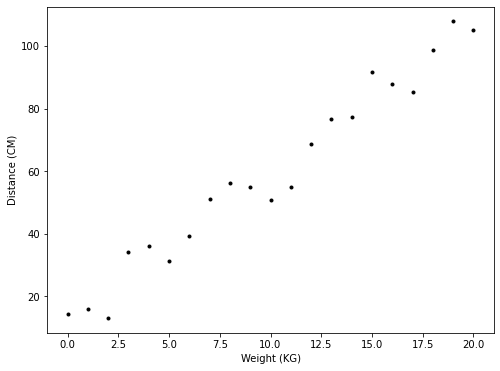

In [36]:
# Create the plot.

plt.plot(w, d, 'k.');

# Set some properties for the plot.
plt.xlabel('Weight (KG)');
plt.ylabel('Distance (CM)');

#### Model
It looks like the data might indeed be linear. The points don't exactly fit on a straight line, but they are not far off it. We might put that down to some other factors, such as the air density, or errors, such as in our tape measure. Then we can go ahead and see what would be the best line to fit the data.

#### Straight lines
All straight lines can be expressed in the form $y = mx + c$. The number $m$ is the slope of the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The number $c$ is the y-intercept of the line. It's the value of $y$ when $x$ is 0.

#### Fitting the model
To fit a straight line to the data, we just must pick values for $m$ and $c$. These are called the parameters of the model, and we want to pick the best values possible for the parameters. That is, the best parameter values given the data observed. Below we show various lines plotted over the data, with different values for $m$ and $c$.

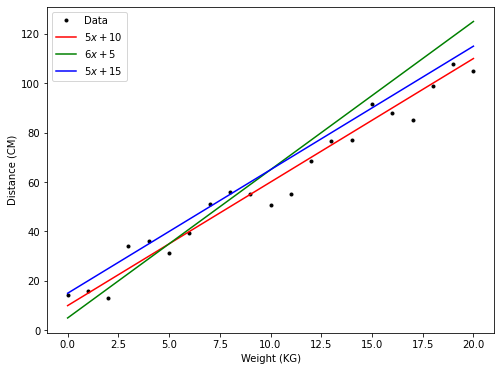

In [40]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data");

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$");
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$");
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$");

# Add a legend.
plt.legend();

# Add axis labels.
plt.xlabel('Weight (KG)');
plt.ylabel('Distance (CM)');

#### Calculating the cost
You can see that each of these lines roughly fits the data. Which one is best, and is there another line that is better than all three? Is there a "best" line?

It depends how you define the word best. Luckily, everyone seems to have settled on what the best means. The best line is the one that minimises the following calculated value.

$$ \sum_i (y_i - mx_i - c)^2 $$
Here $(x_i, y_i)$ is the $i^{th}$ point in the data set and $\sum_i$ means to sum over all points. The values of $m$ and $c$ are to be determined. We usually denote the above as $Cost(m, c)$.

Where does the above calculation come from? It's easy to explain the part in the brackets $(y_i - mx_i - c)$. The corresponding value to $x_i$ in the dataset is $y_i$. These are the measured values. The value $m x_i + c$ is what the model says $y_i$ should have been. The difference between the value that was observed ($y_i$) and the value that the model gives ($m x_i + c$), is $y_i - mx_i - c$.

Why square that value? Well note that the value could be positive or negative, and you sum over all of these values. If we allow the values to be positive or negative, then the positive could cancel the negatives. So, the natural thing to do is to take the absolute value $\mid y_i - m x_i - c \mid$. Well it turns out that absolute values are a pain to deal with, and instead it was decided to just square the quantity instead, as the square of a number is always positive. There are pros and cons to using the square instead of the absolute value, but the square is used. This is usually called least squares fitting.

In [11]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   624.07
Cost with m =  6.00 and c =  5.00:  1510.60
Cost with m =  5.00 and c = 15.00:  1097.13


#### Minimising the cost
We want to calculate values of $m$ and $c$ that give the lowest value for the cost value above. For our given data set we can plot the cost value/function. Recall that the cost is:

$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$
This is a function of two variables, $m$ and $c$, so a plot of it is three dimensional. See the **Advanced section** below for the plot.

In the case of fitting a two-dimensional line to a few data points, we can easily calculate exactly the best values of $m$ and $c$. Some of the details are discussed in the Advanced section, as they involve calculus, but the resulting code is straight-forward. We first calculate the mean (average) values of our $x$ values and that of our $y$ values. Then we subtract the mean of $x$ from each of the $x$ values, and the mean of $y$ from each of the $y$ values. Then we take the dot product of the new $x$ values and the new $y$ values and divide it by the dot product of the new $x$ values with themselves. That gives us $m$, and we use $m$ to calculate $c$.

Remember that in our dataset $x$ is called $w$ (for weight) and $y$ is called $d$ (for distance). We calculate $m$ and $c$ below.

In [13]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 5.231512 and c is 7.932234.


Note that numpy has a function that will perform this calculation for us, called polyfit. It can be used to fit lines in many dimensions.

In [14]:
np.polyfit(w, d, 1)

array([5.23151162, 7.93223434])

#### Best fit line
So, the best values for $m$ and $c$ given our data and using least squares fitting are about $4.95$ for $m$ and about $11.13$ for $c$. We plot this line on top of the data below.

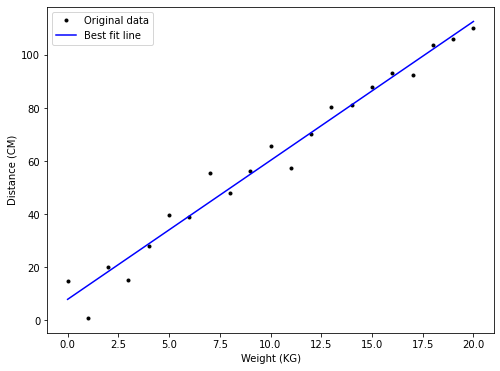

In [17]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data');
plt.plot(w, m * w + c, 'b-', label='Best fit line');

# Add axis labels and a legend.
plt.xlabel('Weight (KG)');
plt.ylabel('Distance (CM)');
plt.legend();

Note that the $Cost$ of the best $m$ and best $c$ is not zero in this case.


In [19]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  5.23 and c =  7.93:   581.52


#### Summary
In this notebook we:

- Investigated the data.
- Picked a model.
- Picked a cost function.
- Estimated the model parameter values that minimised our cost function.

#### Advanced
In the following sections we cover some of the more advanced concepts involved in fitting the line.

#### Simulating data
Earlier in the notebook we glossed over something important: we didn't actually do the weighing and measuring - we faked the data. A better term for this is simulation, which is an important tool in research, especially when testing methods such as simple linear regression.

We ran the following two commands to do this:
```python
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)
```
The first command creates a numpy array containing all values between 1.0 and 21.0 (including 1.0 but not including 21.0) in steps of 1.0.

In [20]:
np.arange(0.0, 21.0, 1.0)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

The second command is more complex. First it takes the values in the w array, multiplies each by 5.0 and then adds 10.0.

In [21]:
5.0 * w + 10.0

array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
        65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.])

It then adds an array of the same length containing random values. The values are taken from what is called the normal distribution with mean 0.0 and standard deviation 5.0.

In [22]:
np.random.normal(0.0, 5.0, w.size)

array([  1.84893918,  -5.30874893,  -3.74464165,  -1.28020211,
         4.57595599,   8.12396936,  -3.30453587,  -4.12335232,
         6.13127232,   0.05521055,  -0.40161298,   1.13329542,
        -0.55877995,   9.77220519,  -3.53554228,   1.60676195,
         7.50719803,  -2.86206358,   6.02927403,  -0.05347152,
       -10.09851886])

The normal distribution follows a bell shaped curve. The curve is centred on the mean (0.0 in this case) and its general width is determined by the standard deviation (5.0 in this case).

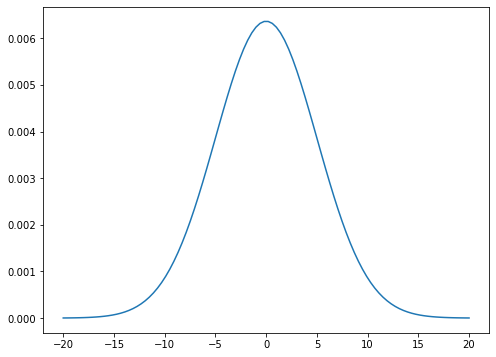

In [43]:
# Plot the normal distrution.
normpdf = lambda mu, s, x: (1.0 / (2.0 * np.pi * s**2)) * np.exp(-((x - mu)**2)/(2 * s**2))

x = np.linspace(-20.0, 20.0, 100)
y = normpdf(0.0, 5.0, x)
plt.plot(x, y);

The idea here is to add a little bit of randomness to the measurements of the distance. The random values are entered around 0.0, with a greater than 99% chance they're within the range -15.0 to 15.0. The normal distribution is used because of the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) which basically states that when a bunch of random effects happen together the outcome looks roughly like the normal distribution. (Don't quote me on that!)

#### Plotting the cost function
We can plot the cost function for a given set of data points. Recall that the cost function involves two variables: $m$ and $c$, and that it looks like this:

$$ Cost(m,c) = \sum_i (y_i - mx_i - c)^2 $$
To plot a function of two variables we need a 3D plot. It can be difficult to get the viewing angle right in 3D plots, but below you can just about make out that there is a low point on the graph around the $(m, c) = (\approx 5.0, \approx 10.0)$ point.

Text(0.5, 0, '$Cost$')

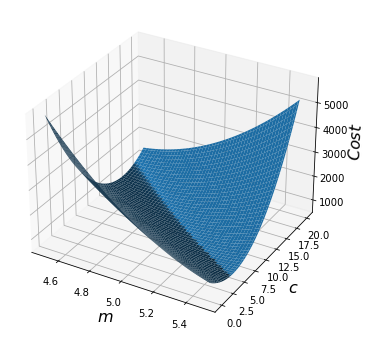

In [25]:

# This code is a little bit involved - don't worry about it.
# Just look at the plot below.

from mpl_toolkits.mplot3d import Axes3D

# Ask pyplot a 3D set of axes.
ax = plt.figure().gca(projection='3d')

# Make data.
mvals = np.linspace(4.5, 5.5, 100)
cvals = np.linspace(0.0, 20.0, 100)

# Fill the grid.
mvals, cvals = np.meshgrid(mvals, cvals)

# Flatten the meshes for convenience.
mflat = np.ravel(mvals)
cflat = np.ravel(cvals)

# Calculate the cost of each point on the grid.
C = [np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)]) for m, c in zip(mflat, cflat)]
C = np.array(C).reshape(mvals.shape)

# Plot the surface.
surf = ax.plot_surface(mvals, cvals, C)

# Set the axis labels.
ax.set_xlabel('$m$', fontsize=16)
ax.set_ylabel('$c$', fontsize=16)
ax.set_zlabel('$Cost$', fontsize=16)

#### Coefficient of determination
Earlier we used a cost function to determine the best line to fit the data. Usually the data do not perfectly fit on the best fit line, and so the cost is greater than 0. A quantity closely related to the cost is the coefficient of determination, also known as the R-squared value. The purpose of the R-squared value is to measure how much of the variance in $y$ is determined by $x$.

For instance, in our example the main thing that affects the distance the spring is hanging down is the weight on the end. It's not the only thing that affects it though. The room temperature and density of the air at the time of measurment probably affect it a little. The age of the spring, and how many times it has been stretched previously probably also have a small affect. There are probably lots of unknown factors affecting the measurment.

The R-squared value estimates how much of the changes in the $y$ value is due to the changes in the $x$ value compared to all of the other factors affecting the $y$ value. It is calculated as follows:

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

Note that sometimes the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is used instead of the R-squared value. You can just square the Pearson coefficient to get the R-squred value.

In [26]:
# Calculate the R-squared value for our data set.
rsq = 1.0 - (np.sum((d - m * w - c)**2)/np.sum((d - d_avg)**2))

print("The R-squared value is %6.4f" % rsq)

The R-squared value is 0.9731


#### The minimisation calculations
Earlier we used the following calculation to calculate $m$ and $c$ for the line of best fit. The code was:
```python
w_zero = w - np.mean(w)
d_zero = d - np.mean(d)

m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
c = np.mean(d) - m * np.mean(w)
```
In mathematical notation we write this as:

$$ m = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2} \qquad \textrm{and} \qquad c = \bar{y} - m \bar{x} $$

where $\bar{x}$ is the mean of $x$ and $\bar{y}$ that of $y$.

Where did these equations come from? They were derived using calculus. We'll give a brief overview of it here, but feel free to gloss over this section if it's not for you. If you can understand the first part, where we calculate the partial derivatives, then great!

The calculations look complex, but if you know basic differentiation, including the chain rule, you can easily derive them. First, we differentiate the cost function with respect to $m$ while treating $c$ as a constant, called a partial derivative. We write this as $\frac{\partial m}{ \partial Cost}$, using $\delta$ as opposed to $d$ to signify that we are treating the other variable as a constant. We then do the same with respect to $c$ while treating $m$ as a constant. We set both equal to zero, and then solve them as two simultaneous equations in two variables.

#### Calculate the partial derivatives
![img](https://render.githubusercontent.com/render/math?math=%5Cbegin%7Balign%7D%0ACost%28m%2C%20c%29%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%26amp%3B%3D%20%5Csum_i%20%28y_i%20-%20mx_i%20-%20c%29%5E2%20%20%20%20%20%20%5C%5C%5B1cm%5D%0A%5Cfrac%7B%5Cpartial%20Cost%7D%7B%5Cpartial%20m%7D%20%26amp%3B%3D%20%5Csum%202%28y_i%20-%20m%20x_i%20-c%29%28-x_i%29%20%5C%5C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%26amp%3B%3D%20-2%20%5Csum%20x_i%20%28y_i%20-%20m%20x_i%20-c%29%20%5C%5C%5B0.5cm%5D%0A%5Cfrac%7B%5Cpartial%20Cost%7D%7B%5Cpartial%20c%7D%20%26amp%3B%20%3D%20%5Csum%202%28y_i%20-%20m%20x_i%20-c%29%28-1%29%20%5C%5C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%26amp%3B%20%3D%20-2%20%5Csum%20%28y_i%20-%20m%20x_i%20-c%29%20%20%20%5C%5C%0A%5Cend%7Balign%7D&mode=display)

#### Set to zero
![img](https://render.githubusercontent.com/render/math?math=%5Cbegin%7Balign%7D%0A%26amp%3B%20%5Cfrac%7B%5Cpartial%20Cost%7D%7B%5Cpartial%20m%7D%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3D%200%20%5C%5C%5B0.2cm%5D%0A%26amp%3B%20%5CRightarrow%20-2%20%5Csum%20x_i%20%28y_i%20-%20m%20x_i%20-c%29%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3D%200%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20%5Csum%20%28x_i%20y_i%20-%20m%20x_i%20x_i%20-%20x_i%20c%29%20%20%20%20%20%20%20%20%20%20%20%3D%200%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20%5Csum%20x_i%20y_i%20-%20%5Csum_i%20m%20x_i%20x_i%20-%20%5Csum%20x_i%20c%20%3D%200%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20m%20%5Csum%20x_i%20x_i%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3D%20%5Csum%20x_i%20y_i%20-%20c%20%5Csum%20x_i%20%5C%5C%5B0.2cm%5D%0A%26amp%3B%20%5CRightarrow%20m%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3D%20%5Cfrac%7B%5Csum%20x_i%20y_i%20-%20c%20%5Csum%20x_i%7D%7B%5Csum%20x_i%20x_i%7D%20%5C%5C%5B0.5cm%5D%0A%26amp%3B%20%5Cfrac%7B%5Cpartial%20Cost%7D%7B%5Cpartial%20c%7D%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3D%200%20%5C%5C%5B0.2cm%5D%0A%26amp%3B%20%5CRightarrow%20-2%20%5Csum%20%28y_i%20-%20m%20x_i%20-%20c%29%20%20%20%20%20%20%20%20%20%20%3D%200%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20%5Csum%20y_i%20-%20%5Csum_i%20m%20x_i%20-%20%5Csum%20c%20%20%20%3D%200%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20%5Csum%20y_i%20-%20m%20%5Csum_i%20x_i%20%20%20%20%20%20%20%20%20%20%20%20%3D%20c%20%5Csum%201%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20c%20%3D%20%5Cfrac%7B%5Csum%20y_i%20-%20m%20%5Csum%20x_i%7D%7B%5Csum%201%7D%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20c%20%3D%20%5Cfrac%7B%5Csum%20y_i%7D%7B%5Csum%201%7D%20-%20m%20%5Cfrac%7B%5Csum%20x_i%7D%7B%5Csum%201%7D%20%5C%5C%5B0.2cm%5D%0A%26amp%3B%20%5CRightarrow%20c%20%3D%20%5Cbar%7By%7D%20-%20m%20%5Cbar%7Bx%7D%20%5C%5C%0A%5Cend%7Balign%7D&mode=display)

#### Solve the simultaneous equations
Here we let $n$ be the length of $x$, which is also the length of $y$.
![img](https://render.githubusercontent.com/render/math?math=%5Cbegin%7Balign%7D%0A%26amp%3B%20m%20%3D%20%5Cfrac%7B%5Csum_i%20x_i%20y_i%20-%20c%20%5Csum_i%20x_i%7D%7B%5Csum_i%20x_i%20x_i%7D%20%5C%5C%5B0.2cm%5D%0A%26amp%3B%20%5CRightarrow%20m%20%3D%20%5Cfrac%7B%5Csum%20x_i%20y_i%20-%20%28%5Cbar%7By%7D%20-%20m%20%5Cbar%7Bx%7D%29%20%5Csum%20x_i%7D%7B%5Csum%20x_i%20x_i%7D%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20m%20%5Csum%20x_i%20x_i%20%3D%20%5Csum%20x_i%20y_i%20-%20%5Cbar%7By%7D%20%5Csum%20x_i%20%2B%20m%20%5Cbar%7Bx%7D%20%5Csum%20x_i%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20m%20%5Csum%20x_i%20x_i%20-%20m%20%5Cbar%7Bx%7D%20%5Csum%20x_i%20%3D%20%5Csum%20x_i%20y_i%20-%20%5Cbar%7By%7D%20%5Csum%20x_i%20%5C%5C%5B0.3cm%5D%0A%26amp%3B%20%5CRightarrow%20m%20%3D%20%5Cfrac%7B%5Csum%20x_i%20y_i%20-%20%5Cbar%7By%7D%20%5Csum%20x_i%7D%7B%5Csum%20x_i%20x_i%20-%20%5Cbar%7Bx%7D%20%5Csum%20x_i%7D%20%5C%5C%5B0.2cm%5D%0A%26amp%3B%20%5CRightarrow%20m%20%3D%20%5Cfrac%7B%5Csum%20%28x_i%20y_i%29%20-%20n%20%5Cbar%7By%7D%20%5Cbar%7Bx%7D%7D%7B%5Csum%20%28x_i%20x_i%29%20-%20n%20%5Cbar%7Bx%7D%20%5Cbar%7Bx%7D%7D%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20m%20%3D%20%5Cfrac%7B%5Csum%20%28x_i%20y_i%29%20-%20n%20%5Cbar%7By%7D%20%5Cbar%7Bx%7D%20-%20n%20%5Cbar%7By%7D%20%5Cbar%7Bx%7D%20%2B%20n%20%5Cbar%7By%7D%20%5Cbar%7Bx%7D%7D%7B%5Csum%20%28x_i%20x_i%29%20-%20n%20%5Cbar%7Bx%7D%20%5Cbar%7Bx%7D%20-%20n%20%5Cbar%7Bx%7D%20%5Cbar%7Bx%7D%20%2B%20n%20%5Cbar%7Bx%7D%20%5Cbar%7Bx%7D%7D%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20m%20%3D%20%5Cfrac%7B%5Csum%20%28x_i%20y_i%29%20-%20%5Csum%20y_i%20%5Cbar%7Bx%7D%20-%20%5Csum%20%5Cbar%7By%7D%20x_i%20%2B%20n%20%5Cbar%7By%7D%20%5Cbar%7Bx%7D%7D%7B%5Csum%20%28x_i%20x_i%29%20-%20%5Csum%20x_i%20%5Cbar%7Bx%7D%20-%20%5Csum%20%5Cbar%7Bx%7D%20x_i%20%2B%20n%20%5Cbar%7Bx%7D%20%5Cbar%7Bx%7D%7D%20%5C%5C%0A%26amp%3B%20%5CRightarrow%20m%20%3D%20%5Cfrac%7B%5Csum_i%20%28x_i%20-%20%5Cbar%7Bx%7D%29%20%28y_i%20-%20%5Cbar%7By%7D%29%7D%7B%5Csum_i%20%28x_i%20-%20%5Cbar%7Bx%7D%29%5E2%7D%20%5C%5C%0A%5Cend%7Balign%7D&mode=display)

#### Using sklearn neural networks
***

In [28]:
import sklearn.neural_network as sknn

# Expects a 2D array of inputs.
w2d = w.reshape(-1, 1)

# Train the neural network.
regr = sknn.MLPRegressor(max_iter=10000).fit(w2d, d)

# Show the predictions.
np.array([d, regr.predict(w2d)]).T

array([[ 14.71564722,  14.71070578],
       [  0.91854535,   4.05863348],
       [ 20.09232413,  12.30214715],
       [ 15.25364437,  20.5394742 ],
       [ 27.92451051,  28.7768009 ],
       [ 39.82660458,  37.00764243],
       [ 38.77925433,  41.94162036],
       [ 55.53803321,  46.87327297],
       [ 48.10544013,  51.80492557],
       [ 56.12660866,  56.73657818],
       [ 65.79858355,  61.66823079],
       [ 57.34102937,  66.59988339],
       [ 70.03896512,  71.531536  ],
       [ 80.39778802,  76.4631886 ],
       [ 81.29681255,  81.39484121],
       [ 88.031238  ,  86.32649381],
       [ 92.9733571 ,  91.25814642],
       [ 92.27034845,  96.18979902],
       [103.76984634, 101.12145163],
       [105.85479691, 106.05310424],
       [110.14098352, 110.98475684]])

In [29]:
# The score.
regr.score(w2d, d)

0.9835710020449818

***